In [3]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
import numpy as np

In [4]:
crime = pd.read_csv("C:\\Users\\kanis\\Documents\\Assignment\\Assignments data\\Clustering\\crime_data.csv")
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [6]:
df_norm = norm_func(crime.iloc[:,1:])
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [7]:
k = list(range(2,8))
k
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))
    
TWSS

[array([16.96661211]),
 array([14.59566832]),
 array([12.72623173]),
 array([11.74757369]),
 array([11.12887939]),
 array([10.6373294])]

([<matplotlib.axis.XTick at 0x295bbe79700>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

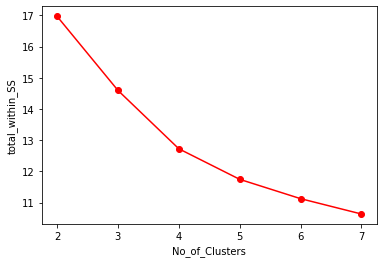

In [8]:
plt.plot(k,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)

In [9]:
kmeans_clust=KMeans(n_clusters=5)
kmeans_clust.fit(df_norm)
Clusters=pd.DataFrame(kmeans_clust.labels_,columns=['Clusters'])
Clusters

,Clusters
0,4
1,0
2,0
3,2
4,0
5,0
6,1
7,2
8,0
9,4


In [11]:
pd.Series(kmeans_clust.labels_).value_counts()

2    12
0    12
3    10
1     9
4     7
dtype: int64

In [9]:
crime['h_clusterid'] = pd.DataFrame(Clusters)

In [10]:
result=crime.iloc[:,1:].groupby(crime.h_clusterid).mean()

In [11]:
result

,Murder,Assault,UrbanPop,Rape,h_clusterid
h_clusterid,,,,,
0,14.671429,251.285714,54.285714,21.685714,0
1,2.680000,70.100000,51.000000,10.910000,1
2,4.955556,125.444444,80.111111,17.788889,2
3,10.966667,264.000000,76.500000,33.608333,3
4,6.975000,148.416667,62.333333,19.775000,4
